In [1]:
import s3fs
import pandas as pd
import matplotlib.pyplot as plt
import re

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Matplotlib is building the font cache; this may take a moment.


In [2]:
# Create an S3 filesystem instance
s3 = s3fs.S3FileSystem()

# Specify the path to the CSV file in the S3 bucket
s3_path = 's3://group-mcm-rplace/sample_df (2).csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(s3.open(s3_path))
df.head()

,Unnamed: 0,timestamp,user,coordinate,pixel_color
0,0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",#FFFFFF
1,1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",#FF4500
2,2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",#000000
3,3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",#000000
4,4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",#000000


In [3]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,timestamp,user,coordinate,pixel_color
0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",#FFFFFF
1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",#FF4500
2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",#000000
3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",#000000
4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",#000000


In [4]:
#filter df to only show first three days
df_first_3_days = df[(df["timestamp"] >= "2023-07-20") & (df["timestamp"] <= "2023-07-23")]
df_first_3_days.tail()

,timestamp,user,coordinate,pixel_color
1137674,2023-07-22 23:59:58.634000+00:00,ID44q/t1XaZx8wnIvc3s3GpWxeZpJ5IXd1AhH7jN17cTLS...,"-878,-534",#FFFFFF
1137675,2023-07-22 23:59:58.967000+00:00,L51lLW/cXbkW2DOXZGLpocEpktVVldNLlQWSfQsOh+vZT1...,"-745,-990",#000000
1137676,2023-07-22 23:59:59.232000+00:00,v1rmxgcBuaW34NxY9aspELLRZA64LT18WDdLmgoQohprjW...,"-991,-762",#FF4500
1137677,2023-07-22 23:59:59.556000+00:00,7ETsEDyFYP4SCZVSK5MgreIB3b4mtes6qGV6fpqWyPR46G...,"350,-332",#811E9F
1137678,2023-07-22 23:59:59.865000+00:00,WgovlROFaBPkMxJVTDNt9Aj3mL70oF5sUOuE0nxgQrS4GN...,"151,169",#FF4500


In [5]:
# Define a regex pattern for "int,int" format
pattern = r'^-?\d+,-?\d+$'

# Filter out coordinates that do not match the pattern
invalid_coordinates = df_first_3_days[~df_first_3_days['coordinate'].astype(str).str.match(pattern)]

print("Coordinates that do not follow the 'int,int' format:")
print(invalid_coordinates)

Coordinates that do not follow the 'int,int' format:
                                timestamp  \
65579    2023-07-20 16:51:11.951000+00:00   
65697    2023-07-20 16:51:31.935000+00:00   
65850    2023-07-20 16:51:58.081000+00:00   
66065    2023-07-20 16:52:36.683000+00:00   
67247    2023-07-20 16:56:01.377000+00:00   
...                                   ...   
1126398  2023-07-22 23:32:25.035000+00:00   
1129841  2023-07-22 23:39:38.763000+00:00   
1129884  2023-07-22 23:39:44.800000+00:00   
1132567  2023-07-22 23:45:22.917000+00:00   
1133429  2023-07-22 23:47:11.147000+00:00   

                                                      user  \
65579    A7w9V1Vj6ihJVcEyOJQNoaW5eAkGUuB6PrJRP5ExxHxBkR...   
65697    /XIhfEKO27ngFqiOWS5VBLbRGEp8eqMghGEcRtH7xFfwtX...   
65850    +4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...   
66065    ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD...   
67247    ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD...   
...                               

In [6]:
# Regular expression patterns
pattern_int_int = r'^(-?\d+),(-?\d+)$'
pattern_int_int_int_int = r'^(-?\d+),(-?\d+),(-?\d+),(-?\d+)$'
pattern_X_Y_R = r'{X: (-?\d+), Y: (-?\d+), R: (\d+)}'

def clean_coordinate(coord):
    if re.match(pattern_int_int, coord):
        return coord
    elif re.match(pattern_int_int_int_int, coord):
        x, y, _, _ = coord.split(',')
        return f"{x},{y}"
    elif re.match(pattern_X_Y_R, coord):
        x, y, _ = re.findall(r'-?\d+', coord)
        return f"{x},{y}"
    else:
        return None

# Apply the cleaning function to the 'coordinate' column
df_first_3_days['coordinate'] = df_first_3_days['coordinate'].apply(clean_coordinate)

# Drop rows with invalid coordinates (None)
df_first_3_days = df_first_3_days.dropna(subset=['coordinate'])
df_first_3_days.head()

/tmp/ipykernel_13928/367691332.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_3_days['coordinate'] = df_first_3_days['coordinate'].apply(clean_coordinate)


,timestamp,user,coordinate,pixel_color
0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",#FFFFFF
1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",#FF4500
2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",#000000
3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",#000000
4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",#000000


In [7]:
df_first_3_days[['x', 'y']] = df_first_3_days['coordinate'].str.split(',', expand=True).astype(int)
df_first_3_days.head()

,timestamp,user,coordinate,pixel_color,x,y
0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",#FFFFFF,-199,-235
1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",#FF4500,-282,136
2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",#000000,4,311
3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",#000000,231,7
4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",#000000,-492,-498


In [33]:
# Group by user and count the number of pixels placed
user_pixel_count = df_first_3_days.groupby('user').size().reset_index(name='pixel_count')

# Sort users by pixel_count in descending order to find the top users
top_users = user_pixel_count.sort_values(by='pixel_count', ascending=False).head(10)

# Display top users
top_users

,user,pixel_count
476063,ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD...,54
590566,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8C...,46
482049,bRwFe1qJhazPc7ur8S6hK8U0J0iPFVap53hfqoo9lxMebV...,37
698673,tFRL97+0mluUiLf6lR3qQnp4pa/pXVBJ6VN0eXBdExFt0V...,34
637235,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,33
1282,+4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...,25
18915,/XIhfEKO27ngFqiOWS5VBLbRGEp8eqMghGEcRtH7xFfwtX...,22
418082,WCnhKn9Z11VwjSWd7kOUrX3MWOLhEyaF4FUK0Dxu+DieIW...,22
395150,UJgZrjNi8XJ9UBsHPJTeU9xqeVB59ccxGwfcyx0gANwQWm...,21
122928,8+D5SY94QDTpdFmAEznI02nRlEpvo2Wg9C4CGNETfJ3ygc...,20


In [34]:
# Filter the original dataframe to include only the top 10 users
df_top_users = df_first_3_days[df_first_3_days['user'].isin(top_users['user'])]

df_top_users

,timestamp,user,coordinate,pixel_color,x,y,time_diff
43960,2023-07-20 15:47:29.270000+00:00,+4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...,"196,-309",#000000,196,-309,NaT
65850,2023-07-20 16:51:58.081000+00:00,+4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...,"-439,361",#FFFFFF,-439,361,0 days 01:04:28.811000
83506,2023-07-20 17:40:03.145000+00:00,+4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...,"-438,402",#FFFFFF,-438,402,0 days 00:48:05.064000
84237,2023-07-20 17:41:57.355000+00:00,+4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...,"-429,401",#000000,-429,401,0 days 00:01:54.210000
101452,2023-07-20 18:22:57.295000+00:00,+4a1m1b35mqMWxSKCjuo7R37dNk3oXKb52VGz0rJtAaNY+...,"-443,402",#FFFFFF,-443,402,0 days 00:40:59.940000
...,...,...,...,...,...,...,...
830026,2023-07-22 10:50:38.154000+00:00,tFRL97+0mluUiLf6lR3qQnp4pa/pXVBJ6VN0eXBdExFt0V...,"868,28",#FFD635,868,28,0 days 00:21:36.397000
838217,2023-07-22 11:20:55.904000+00:00,tFRL97+0mluUiLf6lR3qQnp4pa/pXVBJ6VN0eXBdExFt0V...,"867,26",#FFD635,867,26,0 days 00:30:17.750000
841079,2023-07-22 11:31:26.138000+00:00,tFRL97+0mluUiLf6lR3qQnp4pa/pXVBJ6VN0eXBdExFt0V...,"867,34",#FFD635,867,34,0 days 00:10:30.234000
841200,2023-07-22 11:31:53.356000+00:00,tFRL97+0mluUiLf6lR3qQnp4pa/pXVBJ6VN0eXBdExFt0V...,"867,31",#FFD635,867,31,0 days 00:00:27.218000


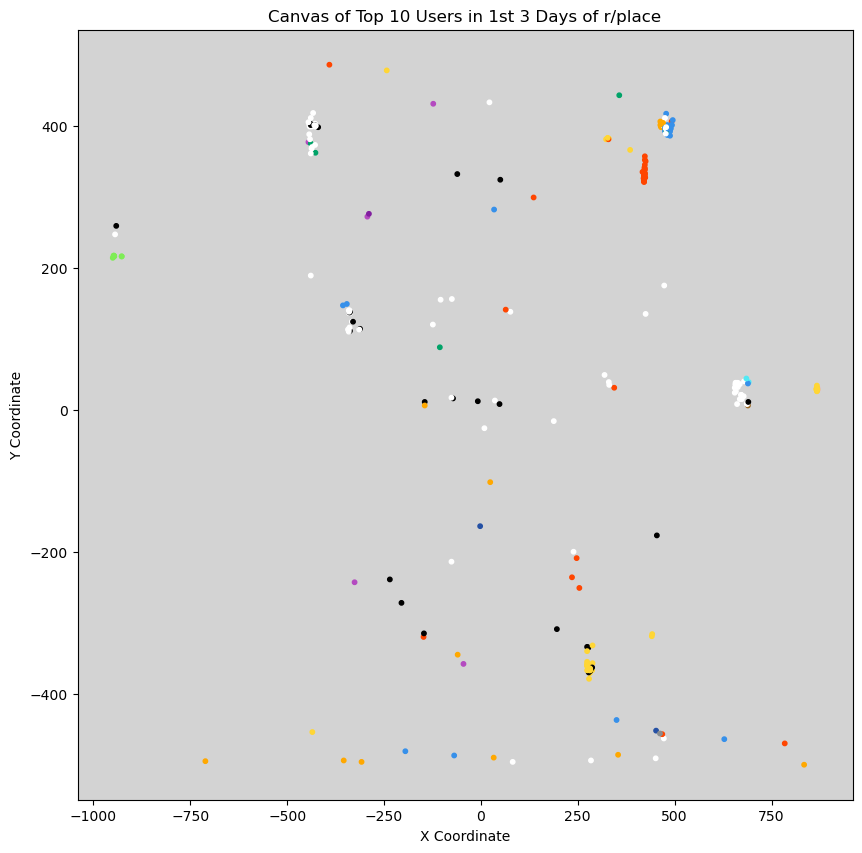

In [18]:
# Plot
plt.figure(figsize=(10, 10))
# for index, row in df_first_3_days.iterrows():
#     plt.scatter(row['x'], row['y'], color=row['pixel_color'], label=row['user'])

plt.scatter(df_top_users['x'], df_top_users['y'], c=df_top_users['pixel_color'], s=10)  # Adjust dot size as needed
plt.title("Canvas of Top 10 Users in 1st 3 Days of r/place")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Set the plot background color
ax = plt.gca()  # Get current axes
ax.set_facecolor('lightgrey')  # Set the background color for the plot area

plt.show()

In [14]:
# Convert timestamp to datetime
#df_first_3_days['timestamp'] = pd.to_datetime(df_first_3_days['timestamp'], infer_datetime_format=True, errors='coerce')

# Group by user and calculate timestamp variation
df_grouped = df_first_3_days.groupby('user').agg(timestamp_variation=('timestamp', lambda x: x.max() - x.min())).reset_index()

# Sort by timestamp variation in descending order
df_grouped = df_grouped.sort_values(by='timestamp_variation', ascending=True)

df_grouped.head()

,user,timestamp_variation
390566,TxugeWn7LrGqK+7/0J4b/EsESKALj778QJ2uobZ87uN6X2...,0 days
480772,bLFp/X4NWkh1PL+nDU5pffNkxezFWXgmY8Zq/iJnTi4ntk...,0 days
480773,bLGWpEm6PcH5IBnfWrtM5tRya5bBSAiYVly2sIx8Z+scAC...,0 days
480776,bLH+EZJbo5domFNbJlpJZ/3Oiq8Zcw2uB2omFH7wuWhuGP...,0 days
480777,bLH4ttjxYmAZoSKe4F3TiAo1nFA7X9kBXr7UgaTbknnXek...,0 days


In [ ]:
# Filter the original dataframe to include only the top 10 users
df_top_users2 = df_first_3_days[df_first_3_days['user'].isin(df_grouped['user'])]

df_top_users2.head()

In [28]:
# Assuming 'sorted_users' is a Series with the index as 'user' and the values as the average time difference

# Calculate the 90th percentile value directly on the Series
percentile_value = sorted_users.quantile(0.001)

# To select the top 10% of users based on time difference, you should filter based on this value.
# However, whether you use >= or <= depends on how you define "top" in terms of time difference.
# If a lower time difference is considered better (more active), you should get users below the 90th percentile value.
# If a higher time difference is considered "top" (less active), you should get users above this value.
# Assuming you want the latter (less active), here's how you might proceed:

# Filter for users with average time difference greater than or equal to the 90th percentile value
# Note: This step is conceptual; the exact implementation depends on your goal and the structure of 'sorted_users'.
top_10_percent_users = sorted_users[sorted_users >= percentile_value]

# Displaying the top 10 percent users
top_10_percent_users

user
gdq72t7pRy+0C11kWNKf3O2+3yOAXhBCXFxiB0vG0kyHIIssgKtY6OBw2Nv+K2nNOTAjSNSDKevFGUkGNqlfpg==   0 days 00:05:03.215000
98egoFYZf2217Xh5e9DzuSIDB8nQuXkwp3/NkvkXIsBmTDKIqJQiOsWgXS1zIKoFJ5sXE4OY4RRC1jWQIfarzA==   0 days 00:05:03.223000
7NaBTmMtTU8sBq9G2Zu1lB9wXOuixbqfjsuZCqt/B9TnX55QTSDzL0XY5Y4WGYkFcxelkpO6NzVLrWnOrEnAIA==   0 days 00:05:03.241000
URF/XEwWKOfNP1bwMnJ9w9QUT5QMipSwHRJJZ+XvYor7tbDmJeFHt7aoPVTfX/UANJioCfEWm38AUvxEW70HWA==   0 days 00:05:03.243000
gI3j3anFAXLWZmSh5B+1oJdNc4p4gh23K4zmX/YN5PWoxBlTPQFx8EoOvCwZnG/k0OTUu4SobYsKoIWABhy2Yg==   0 days 00:05:03.247000
                                                                                                    ...          
qdSPAmkF9lg/pl9/PCIXUjbSFX30UwATXPbxQKf34M3fXM3X5Gx5ARqg7IM/N0Y239gG2nJl6g/c+2Irhz+5ZQ==   2 days 10:05:26.538000
9++ptAji4T9qHG4AFzWytLXaHWBSyFPV+aRYpfCrB82dicj0gBS4gx2LeFMOOV60GjbTJmAAjxih3KWR3QNGDA==   2 days 10:07:01.720000
4NEthHnGE8lXBv+FcPyuH0MwU0X4vFBmjdYVksSI3uM5mOC7iGN+v77V92PNoltcR+K36YT/nOrxmFPYFiy

In [62]:
# Filter the original dataframe to include only the top 10 users
df_top_users2 = df_first_3_days[df_first_3_days['user'].isin(top_10_data_selected['user'])]

df_top_users2.head()

,timestamp,user,coordinate,pixel_color,x,y,time_diff
1126874,2023-07-22 23:33:22.351000+00:00,0F6FOEl41cK6C8bZ7Nu7BVEZ18TQjy+INUhBSyD5KFEZ0f...,"386,483",#FFD635,386,483,NaT
1126877,2023-07-22 23:33:22.683000+00:00,0F6FOEl41cK6C8bZ7Nu7BVEZ18TQjy+INUhBSyD5KFEZ0f...,"386,483",#FFD635,386,483,0 days 00:00:00.332000
575792,2023-07-21 19:52:51.160000+00:00,AHBC8S7RtBWJLwKrtGT/hDVNUiAujQ+U2NDBc8HOm6nwd0...,"799,182",#FF4500,799,182,NaT
575794,2023-07-21 19:52:51.412000+00:00,AHBC8S7RtBWJLwKrtGT/hDVNUiAujQ+U2NDBc8HOm6nwd0...,"801,182",#FF4500,801,182,0 days 00:00:00.252000
1020716,2023-07-22 19:48:38.832000+00:00,hbWbPtent2YueJ6GoUYf8UcnYu780gz0rzSqyiQtV6pD/A...,"-756,86",#FFFFFF,-756,86,NaT
